# Subset Selection

This approach involves identifying a subset of the $p$ features (predictors) out of the $k$ that we believe to be related to the response. We then fit a model using OLS on the reduced set of variables.

In [1]:
## removing everything from memory
rm(list=ls())
## turning all warnings off
options(warn=-1)

## installing the 'wooldridge' package if not previously installed
if (!require(wooldridge)) install.packages('wooldridge')

## loading the packages
library(wooldridge)

data(hprice2)

##  hprice2
##  Obs:   506

##  1. price                    median housing price, $
##  2. crime                    crimes committed per capita
##  3. nox                      nitrous oxide, parts per 100 mill.
##  4. rooms                    avg number of rooms per house
##  5. dist                     weighted dist. to 5 employ centers
##  6. radial                   accessibiliy index to radial hghwys
##  7. proptax                  property tax per $1000
##  8. stratio                  average student-teacher ratio
##  9. lowstat                  % of people 'lower status'
## 10. lprice                   log(price)
## 11. lnox                     log(nox)
## 12. lproptax                 log(proptax)

## specifying the outcome variable (y) and predictors (X)
outcome <- "lprice"
predictors <- c("lnox", "lproptax", "crime", "rooms", "dist", "radial", "stratio", "lowstat")

## creating a copy of the data set containing only relevant outcome and features
datos <- subset(hprice2,select=c(outcome,predictors))

Loading required package: wooldridge



## _Best_ Subset Selection

To perform best subset selection, we fit a separate OLS regression best subset for each possible combination of the $k$ predictors. That is, we fit _all_ $k$ models selection that contain exactly one predictor, all $\left(\begin{array}{l}{k} \\ {2}\end{array}\right)=k(k-1) / 2$ models that contain exactly two predictors, and so forth. We then look at all of the resulting models, with the goal of identifying the one that is best.

In [2]:
## for easy data manipulation and visualization
if (!require(tidyverse)) install.packages('tidyverse')
library(tidyverse)

## for easy machine learning workflow
if (!require(caret)) install.packages('caret')
library(caret)

## for computing best subsets regression
if (!require(leaps)) install.packages('leaps')
library(leaps)

Loading required package: tidyverse

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

v ggplot2 3.3.3     v purrr   0.3.4
v tibble  3.0.5     v dplyr   1.0.3
v tidyr   1.1.2     v stringr 1.4.0
v readr   1.4.0     v forcats 0.5.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Loading required package: caret

Loading required package: lattice


Attaching package: 'caret'


The following object is masked from 'package:purrr':

    lift


Loading required package: leaps



***
**Algorithm**: <ins>_Best_ Subset Selection</ins>

1. Let $\mathcal{M}_{0}$ denote the null model, which contains no predictors. This model simply predicts the sample mean for each observation.
2. For $p=1,2, \ldots k$:
 1. Fit all $\left(\begin{array}{l}{k} \\ {p}\end{array}\right)$ models that contain exactly $p$ predictors.
 2. Pick the best among these $\left(\begin{array}{l}{k} \\ {p}\end{array}\right)$ models, and call it $\mathcal{M}_{p}$. Here best is defined as having the smallest $RSS$, or equivalently largest $R^{2}$.

In [3]:
models.best <- regsubsets(lprice~., data = datos, nvmax = 8,method="exhaustive")

## returning the set of Mp models
summary(models.best)

Subset selection object
Call: regsubsets.formula(lprice ~ ., data = datos, nvmax = 8, method = "exhaustive")
8 Variables  (and intercept)
         Forced in Forced out
lnox         FALSE      FALSE
lproptax     FALSE      FALSE
crime        FALSE      FALSE
rooms        FALSE      FALSE
dist         FALSE      FALSE
radial       FALSE      FALSE
stratio      FALSE      FALSE
lowstat      FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: exhaustive
         lnox lproptax crime rooms dist radial stratio lowstat
1  ( 1 ) " "  " "      " "   " "   " "  " "    " "     "*"    
2  ( 1 ) " "  " "      " "   " "   " "  " "    "*"     "*"    
3  ( 1 ) " "  " "      "*"   "*"   " "  " "    " "     "*"    
4  ( 1 ) " "  " "      "*"   "*"   " "  " "    "*"     "*"    
5  ( 1 ) " "  " "      "*"   "*"   "*"  " "    "*"     "*"    
6  ( 1 ) "*"  " "      "*"   "*"   "*"  " "    "*"     "*"    
7  ( 1 ) "*"  " "      "*"   "*"   "*"  "*"    "*"     "*"    
8  ( 1 ) "*"  "*"      "*

3. Select a single best model from among $\mathcal{M}_{0}, \ldots, \mathcal{M}_{k}$ using a *model selection criteria* previously discussed such as cross-validated prediction error, $C_{p}(\mathrm{AIC}), \mathrm{BIC}$, adjusted $R^{2}$, etc.

In [4]:
## selecting a single model based on selection criteria: Adjusted R2, Cp and BIC
res.sum <- summary(models.best)
data.frame(Adj.R2 = which.max(res.sum$adjr2),
           CP = which.min(res.sum$cp),
           BIC = which.min(res.sum$bic)
          )

Adj.R2,CP,BIC
<int>,<int>,<int>
8,8,8


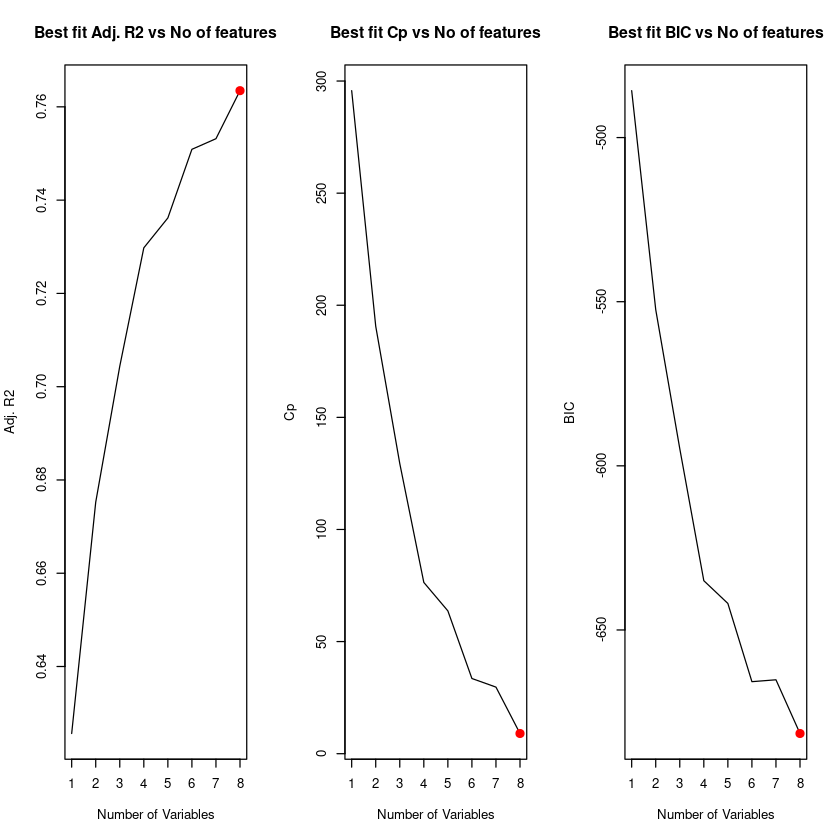

In [5]:
par(mfrow=c(1,3))

# Plot the Adjusted R2 vs number of variables 
plot(res.sum$adjr2,xlab="Number of Variables",ylab="Adj. R2",type="l",main="Best fit Adj. R2 vs No of features")
# Get the index of the minimum value
a=which.max(res.sum$adjr2)
# Mark this in red
points(a,res.sum$adjr2[a],col="red",cex=2,pch=20)

# Plot the Cp vs number of variables 
plot(res.sum$cp,xlab="Number of Variables",ylab="Cp",type="l",main="Best fit Cp vs No of features")
# Get the index of the minimum value
b=which.min(res.sum$cp)
# Mark this in red
points(b,res.sum$cp[b],col="red",cex=2,pch=20)

# Plot the BIC vs number of variables 
plot(res.sum$bic,xlab="Number of Variables",ylab="BIC",type="l",main="Best fit BIC vs No of features")
# Get the index of the minimum value
c=which.min(res.sum$bic)
# Mark this in red
points(c,res.sum$bic[c],col="red",cex=2,pch=20)

***
⚠️ The number of possible models that must be considered grows rapidly as $k$ increases, e.g., if $k$=10, then there are approximately 1,000 possible models to be considered, and if $k=20$, there are over one million possibilities (1,048,576)!

## Stepwise Selection: _Forward_ Stepwise Selection

For computational reason, the previous '_best_ subset selection' cannot be applied with very large $k$ (remember it consinders all $2^k$  possible models). The algorithm begins with a model containing no predictors, and then adds predictors to the model, one-at-a-time, untill all the predictors are in the model.

***
**Algorithm**: <ins>_Forward_ Stepwise Selection</ins>

1. Let $\mathcal{M}_{0}$ denote the null model, which contains _no_ predictors.
2. For $p=0,1,2,\ldots, k-1$:
 1. Consider all $k-p$ models that augment the predictors in $\mathcal{M}_{p}$ with one additional predictor.
 2. Choose the _best_ among these $k-p$ models, and call it $\mathcal{M}_{p+1}$. Here best is defined as having smallest $RSS$ or highest $R^{2}$.

In [6]:
models.forward <- regsubsets(lprice~., data = datos, nvmax = 8,method="forward")

## returning the set of Mp models
summary(models.forward)

Subset selection object
Call: regsubsets.formula(lprice ~ ., data = datos, nvmax = 8, method = "forward")
8 Variables  (and intercept)
         Forced in Forced out
lnox         FALSE      FALSE
lproptax     FALSE      FALSE
crime        FALSE      FALSE
rooms        FALSE      FALSE
dist         FALSE      FALSE
radial       FALSE      FALSE
stratio      FALSE      FALSE
lowstat      FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: forward
         lnox lproptax crime rooms dist radial stratio lowstat
1  ( 1 ) " "  " "      " "   " "   " "  " "    " "     "*"    
2  ( 1 ) " "  " "      " "   " "   " "  " "    "*"     "*"    
3  ( 1 ) " "  " "      "*"   " "   " "  " "    "*"     "*"    
4  ( 1 ) " "  " "      "*"   "*"   " "  " "    "*"     "*"    
5  ( 1 ) " "  " "      "*"   "*"   "*"  " "    "*"     "*"    
6  ( 1 ) "*"  " "      "*"   "*"   "*"  " "    "*"     "*"    
7  ( 1 ) "*"  " "      "*"   "*"   "*"  "*"    "*"     "*"    
8  ( 1 ) "*"  "*"      "*"   "*

3. Select a single best model from among $\mathcal{M}_{0}, \ldots, \mathcal{M}_{k}$ using a *model selection criteria* previously discussed such as cross-validated prediction error, $C_{p}(\mathrm{AIC}), \mathrm{BIC}$, adjusted $R^{2}$, etc.

In [7]:
## selecting a single model based on selection criteria: Adjusted R2, Cp and BIC
res.sum <- summary(models.forward)
data.frame(Adj.R2 = which.max(res.sum$adjr2),
           CP = which.min(res.sum$cp),
           BIC = which.min(res.sum$bic)
          )

Adj.R2,CP,BIC
<int>,<int>,<int>
8,8,8


***
⚠️ There are a total of $1+\sum_{p=0}^{k-1}(k-p)=1+\frac{k(k+1)}{2}$ models to be estimated instead of $2^{k}$ as before,
e.g. if $k=20,$ there are 211 models to be estimated! Interestingly it will work even when <font color=blue>$k>n$</font>.

## Stepwise Selection: _Backward_ Stepwise Selection

Unlike forward stepwise selection, it begins with the full least squares model containing all $k$ regressors, and then iteractively the least useful regressors one-at-a-time until there are no predictors in the model, i.e., the null model.

***
**Algorithm**: <ins>_Backward_ Stepwise Selection</ins>

1. Let $\mathcal{M}_{k}$ denote the full model, which contains _all_ $k$ predictors.
2. For $p=k,k-1,\ldots, 1$:
 1. Consider all $p$ models that contain all but one of the predictors in $\mathcal{M}_{p}$ for a total of $p-1$ predictors.
 2. Choose the best among these $p$ models, and call it $\mathcal{M}_{p-1}$. Here best is defined as having smallest RSS or highest $R^{2}$.

In [8]:
models.backward <- regsubsets(lprice~., data = datos, nvmax = 8,method="backward")

## returning the set of Mp models
summary(models.backward)

Subset selection object
Call: regsubsets.formula(lprice ~ ., data = datos, nvmax = 8, method = "backward")
8 Variables  (and intercept)
         Forced in Forced out
lnox         FALSE      FALSE
lproptax     FALSE      FALSE
crime        FALSE      FALSE
rooms        FALSE      FALSE
dist         FALSE      FALSE
radial       FALSE      FALSE
stratio      FALSE      FALSE
lowstat      FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         lnox lproptax crime rooms dist radial stratio lowstat
1  ( 1 ) " "  " "      " "   " "   " "  " "    " "     "*"    
2  ( 1 ) " "  " "      "*"   " "   " "  " "    " "     "*"    
3  ( 1 ) " "  " "      "*"   "*"   " "  " "    " "     "*"    
4  ( 1 ) " "  " "      "*"   "*"   " "  " "    "*"     "*"    
5  ( 1 ) " "  " "      "*"   "*"   "*"  " "    "*"     "*"    
6  ( 1 ) "*"  " "      "*"   "*"   "*"  " "    "*"     "*"    
7  ( 1 ) "*"  " "      "*"   "*"   "*"  "*"    "*"     "*"    
8  ( 1 ) "*"  "*"      "*"   

3. Select a single best model from among $\mathcal{M}_{0}, \ldots, \mathcal{M}_{k}$ using a *model selection criteria* previously discussed such as cross-validated prediction error, $C_{p}(\mathrm{AIC}), \mathrm{BIC}$, adjusted $R^{2}$, etc.

In [9]:
## selecting a single model based on selection criteria: Adjusted R2, Cp and BIC
res.sum <- summary(models.backward)
data.frame(Adj.R2 = which.max(res.sum$adjr2),
           CP = which.min(res.sum$cp),
           BIC = which.min(res.sum$bic)
          )

Adj.R2,CP,BIC
<int>,<int>,<int>
8,8,8


***
⚠️ Unlike the _forward_ stepwise selection algorithm, this will _only_ work when <font color=blue>$n>k$</font>.

<font color=red><ins>Note</ins> Notice that the $\bar{R}^2$, BIC and $C_p$ are calculated on the training data that have been used to fit the model. This means that, the model selection, using these metrics, is possibly subject to overfitting and may not perform as well when applied to new data.</font>

## Choosing the _Optimal_ Model

All the previous algorithms are good in selecting a model that best fit the training data set (because they all minimize the $RSS$ which is equivalent to maximize the $R^2$  for these observations) and this does not necessarily mean they minimize the $RSS$ in any validation data set. Therefore 'training set' $RSS$ and 'training set' $R^2$  cannot be used to select from among a set of models with different numbers of variables if we are meant to use this model for _prediction_. Therefore we can replace step 3 in these algorithms with a step where the __cross-validated prediction error__  is calculated using observations in the validation data set!

💡 Of course you can use other _model selection criteria_ like $\bar{R}^2$, $C_p$ (AIC), BIC, etc., _but_ if we care about the prediction power of our model, the __cross-validated prediction error__ is a more natural choice.

💡 Remember that the $k$-fold Cross-validation consists of first dividing the data into $k$ subsets, also known as $k$-fold, where $k$ is generally set to 5 or 10. Each subset (10%) serves successively as test data set and the remaining subset (90%) as training data. The average cross-validation error is computed as the model prediction error.

💻 The following user-written ```get_model_formula()``` function allows to access easily the formula of the models returned by the function ```regsubsets()``` above.

In [10]:
## id: model id
## object: regsubsets object
## data: data used to fit regsubsets
## outcome: outcome variable
get_model_formula <- function(id, object, outcome){
  models <- summary(object)$which[id,-1] # get models data
  # Get model predictors
  predictors <- names(which(models == TRUE))
  predictors <- paste(predictors, collapse = "+")
  # Build model formula
  as.formula(paste0(outcome, "~", predictors))
}

💻 For example the following code returns the best 6-variable model formula from the previous _best_ subset selection, i.e., $\mathcal{M}_{6}$

In [11]:
get_model_formula(6, models.best, "lprice")

lprice ~ lnox + crime + rooms + dist + stratio + lowstat
<environment: 0x5610724d3148>

💻 The following user-written ```get_cv_error()``` calculates the cross-validation (CV) ```method="cv"``` error for a given model ```model.formula```, using data set ```data``` and 5-folds ```number=5```.

In [12]:
get_cv_error <- function(model.formula, data){
      set.seed(38)
      train.control <- trainControl(method = "cv", number = 10)
      cv <- train(model.formula, data = data, method = "lm",
                  trControl = train.control)
      cv$results$RMSE
}

💻 Finally, use the above defined user-written functions to compute the prediction error of the different best models returned by the ```regsubsets(...,method="exhaustive")``` function:

In [13]:
## compute cross-validation error
model.ids <- 1:8
cv.errors <-  map(model.ids, get_model_formula, models.best, "lprice") %>%
  map(get_cv_error, data = datos) %>%
  unlist()
cv.errors

[1] 0.2494993 0.2312012 0.2236093 0.2134483 0.2110205 0.2069924 0.2064766
[8] 0.2020592

In [14]:
## select the model that minimize the CV error
which.min(cv.errors)

[1] 8

💻 It can be seen that the model with 8 variables is the best model. It has the lower prediction error. The regression coefficients of this model can be extracted as follow:

In [15]:
coef(models.best, 8)

(Intercept)        lnox    lproptax       crime       rooms        dist 
12.65161528 -0.45033297 -0.22737525 -0.01126515  0.09899825 -0.04880525 
     radial     stratio     lowstat 
 0.01146933 -0.04041845 -0.02826845

Obviously, you can find the best model using the _forward_ and _backward_ stepwise selection algorithms following the steps above by replacing the user-given names ```model.best``` to either ```model.forward``` or ```model.backwards```, but there is a quicker cleaner way using the ```library(caret)``` package:

In [16]:
## set seed for reproducibility
set.seed(42)
## set up repeated 10-fold cross-validation
train.control <- trainControl(method = "cv", number = 10)
# Train the model
step.model <- train(lprice ~., data = datos,
                    method = "leapBackward", 
                    tuneGrid = data.frame(nvmax = 1:8),
                    trControl = train.control
                    )
step.model$results

,nvmax,RMSE,Rsquared,MAE,RMSESD,RsquaredSD,MAESD
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0.2496842,0.6499758,0.1854229,0.04121381,0.10267640,0.02369362
2,2,0.2450988,0.6614763,0.1777343,0.03425180,0.07622296,0.01927140
3,3,0.2325583,0.6922715,0.1671111,0.03628467,0.07726679,0.02075568
4,4,0.2149903,0.7379170,0.1534946,0.02860218,0.05981698,0.01595006
5,5,0.2123247,0.7448182,0.1510687,0.02753551,0.06044552,0.01381381
6,6,0.2115773,0.7432402,0.1512529,0.02847720,0.05550728,0.01630882
7,7,0.2111953,0.7446154,0.1523720,0.03016770,0.05591514,0.01663134
8,8,0.2026665,0.7648092,0.1460690,0.02804981,0.04519522,0.01377005


💻 If we are interested in using a _forward_ stepwise selection algorithm we simply need to change the method in the code snippet above to ```method = "leapForward"```.

💻 The following set of commands identify the _best_ model in terms of the calculated $RMSE$:

In [17]:
## retrieving the best model in terms of 10-fold CV RMSE
step.model$bestTune

,nvmax
,<int>
8,8


In [18]:
## looking at the specification of the best model
summary(step.model$finalModel)

Subset selection object
8 Variables  (and intercept)
         Forced in Forced out
lnox         FALSE      FALSE
lproptax     FALSE      FALSE
crime        FALSE      FALSE
rooms        FALSE      FALSE
dist         FALSE      FALSE
radial       FALSE      FALSE
stratio      FALSE      FALSE
lowstat      FALSE      FALSE
1 subsets of each size up to 8
Selection Algorithm: backward
         lnox lproptax crime rooms dist radial stratio lowstat
1  ( 1 ) " "  " "      " "   " "   " "  " "    " "     "*"    
2  ( 1 ) " "  " "      "*"   " "   " "  " "    " "     "*"    
3  ( 1 ) " "  " "      "*"   "*"   " "  " "    " "     "*"    
4  ( 1 ) " "  " "      "*"   "*"   " "  " "    "*"     "*"    
5  ( 1 ) " "  " "      "*"   "*"   "*"  " "    "*"     "*"    
6  ( 1 ) "*"  " "      "*"   "*"   "*"  " "    "*"     "*"    
7  ( 1 ) "*"  " "      "*"   "*"   "*"  "*"    "*"     "*"    
8  ( 1 ) "*"  "*"      "*"   "*"   "*"  "*"    "*"     "*"    

In [19]:
## looking at the estimated coefficient of the best model
coef(step.model$finalModel, 8)

(Intercept)        lnox    lproptax       crime       rooms        dist 
12.65161528 -0.45033297 -0.22737525 -0.01126515  0.09899825 -0.04880525 
     radial     stratio     lowstat 
 0.01146933 -0.04041845 -0.02826845